In [1]:
import pandas as pd
import pickle
import utils_centrality as utils

In [2]:
with open('graph_objects/G_simple_directed_iggielgn.pickle', 'rb') as f:
    G_simple_directed = pickle.load(f)
    G_simple_directed.name = 'G_simple_directed'

In [3]:
run_analysis = False

# Dataset; 'iggin' or 'iggielgn'
dataset = 'iggielgn'

---

# N-k CENTRALITY

### Node removal

In [4]:
"""
Random node removal 
Averaged 5 benchmarks for k_removals = 2500
Averaged 5 benchmarks for k_removals = 500
"""
if run_analysis:
    random_node_removal_df = utils.n_minus_k(G_simple_directed, heuristic='random', remove='node', k_removals=500, n_benchmarks=5)
    random_node_removal_df.to_pickle('results/centrality/'+dataset+'/random_node_removal.pkl')
random_node_removal_df = pd.read_pickle('results/centrality/'+dataset+'/random_node_removal.pkl')

In [5]:
"""
Greedy node removal (i.e. remove the node by CCI_v score)
"""
if run_analysis:
    greedy_node_removal_df = utils.n_minus_k(G_simple_directed, heuristic='greedy', remove='node')
    greedy_node_removal_df.to_pickle('results/centrality/'+dataset+'/greedy_node_removal.pkl')
greedy_node_removal_df = pd.read_pickle('results/centrality/'+dataset+'/greedy_node_removal.pkl')
utils.results_summary(greedy_node_removal_df, metric='NPI')

Heuristic: entity criticality index

First entity removals:
----------------------------------------------
 it removed_entity  diff  pct_change
  1      LKD_N_133  0.05        -5.0
  2       LKD_N_94  0.02        -2.1
  3  N_2631_S_LMGN  0.13       -13.9
  4       LKD_N_97  0.11       -13.8
  5        LKD_N_8  0.02        -2.9

Entity removals causing most damage, measured by: NPI
----------------------------------------------
 it removed_entity  diff  pct_change
  3  N_2631_S_LMGN  0.13       -13.9
  4       LKD_N_97  0.11       -13.8
 12       LKD_N_41  0.10       -17.4
  1      LKD_N_133  0.05        -5.0
 13   N_730_M_LMGN  0.05       -10.6


Summary statistics (first 10 removals)
----------------------------------------------
Percentage network damage: 41.4%
Mean damage per entity removal: 0.09
Variation in damage per entity removal: 0.04
The metric reaches 0 at iteration 1369.


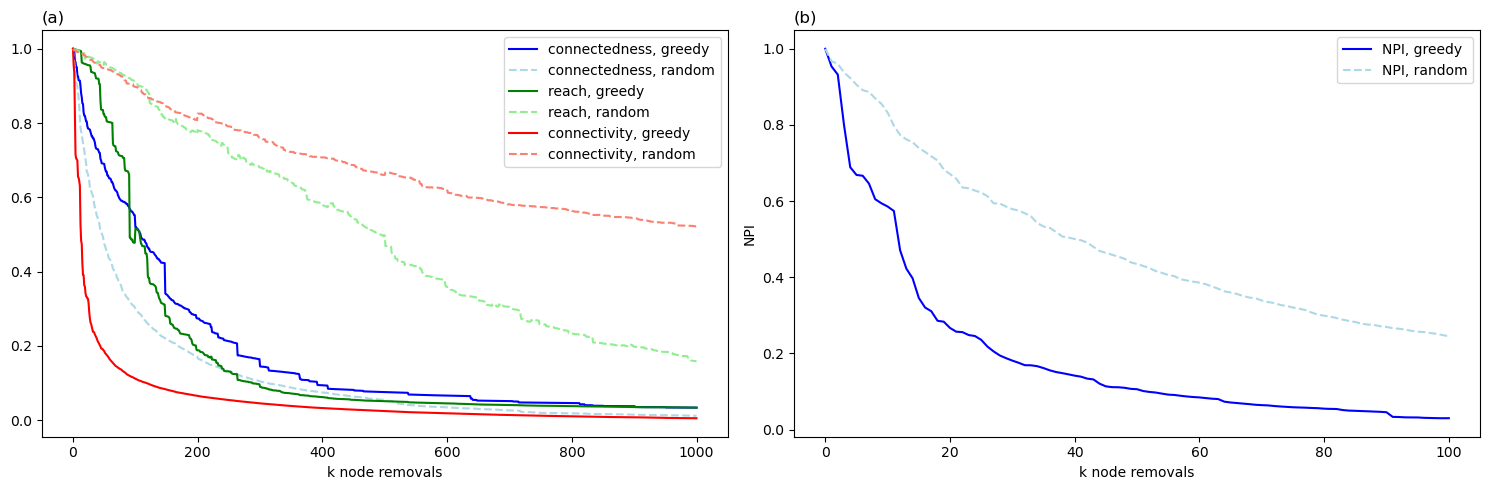

In [6]:
utils.plot_comparison(greedy_node_removal_df, random_node_removal_df)

### Edge removal

In [7]:
"""
Random edge removal  
Averaged 5 benchmarks for k_removals = 2500
Averaged 5 benchmarks for k_removals = 500
"""
if run_analysis:
    random_edge_removal_df = utils.n_minus_k(G_simple_directed, heuristic='random', remove='edge', k_removals=500, n_benchmarks=5)
    random_edge_removal_df.to_pickle('results/centrality/'+dataset+'/random_edge_removal.pkl')
random_edge_removal_df = pd.read_pickle('results/centrality/'+dataset+'/random_edge_removal.pkl')

In [8]:
"""
Greedy edge removal (i.e. remove the edge by CCI_e score)  
"""
if run_analysis:
    greedy_edge_removal_df = utils.n_minus_k(G_simple_directed, heuristic='greedy', remove='edge')
    greedy_edge_removal_df.to_pickle('results/centrality/'+dataset+'/greedy_edge_removal.pkl')
greedy_edge_removal_df = pd.read_pickle('results/centrality/'+dataset+'/greedy_edge_removal.pkl')
utils.results_summary(greedy_edge_removal_df, metric='NPI')

Heuristic: entity criticality index

First entity removals:
----------------------------------------------
 it                       removed_entity  diff  pct_change
  1               {LKD_N_148, LKD_N_158}  0.05        -5.0
  2    {N_161_L_LMGN, SEQ_10405__S_LMGN}  0.14       -14.7
  3         {N_730_M_LMGN, N_731_M_LMGN}  0.09       -11.1
  4 {SEQ_5193__L_LMGN, SEQ_5183__L_LMGN}  0.11       -15.1
  5               {LKD_N_137, LKD_N_118}  0.07       -11.4

Entity removals causing most damage, measured by: NPI
----------------------------------------------
 it                       removed_entity  diff  pct_change
  2    {N_161_L_LMGN, SEQ_10405__S_LMGN}  0.14       -14.7
  4 {SEQ_5193__L_LMGN, SEQ_5183__L_LMGN}  0.11       -15.1
  3         {N_730_M_LMGN, N_731_M_LMGN}  0.09       -11.1
  5               {LKD_N_137, LKD_N_118}  0.07       -11.4
  1               {LKD_N_148, LKD_N_158}  0.05        -5.0


Summary statistics (first 10 removals)
------------------------------------------

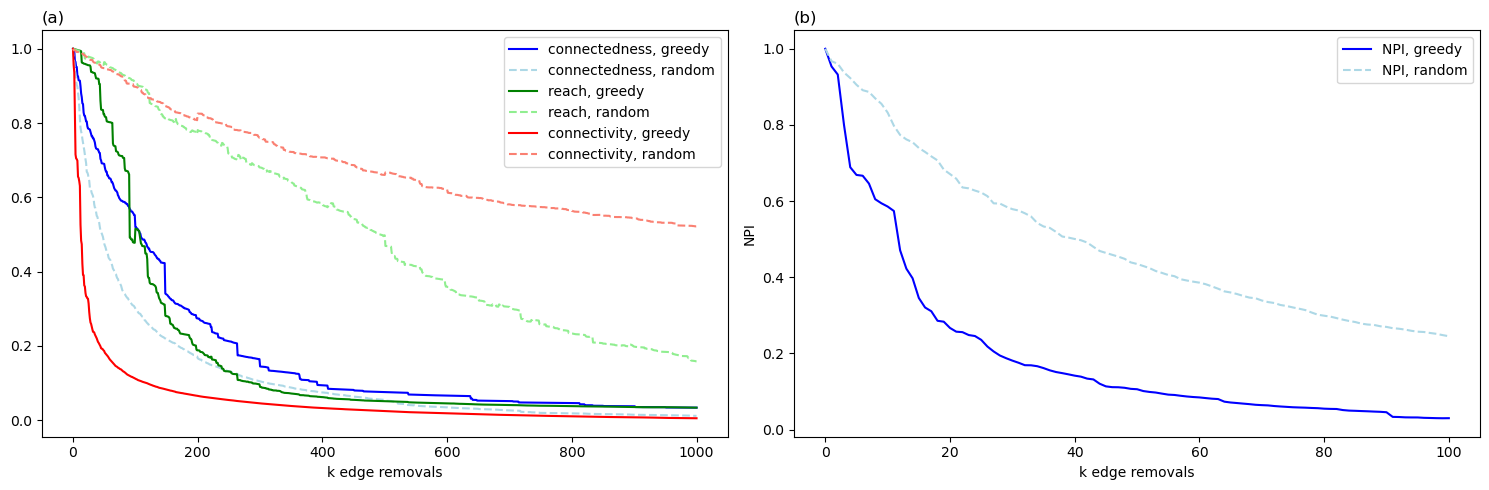

In [9]:
utils.plot_comparison(greedy_node_removal_df, random_node_removal_df, entity='edge')